In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Set the directories for the training and validation datasets
train_dir = 'Braintumour/Train'
val_dir = 'Braintumour/Test'

In [11]:
# Set the parameters for the image preprocessing
img_width, img_height = 224, 224
batch_size = 32

In [12]:
# Create data generators to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 255 images belonging to 2 classes.


In [14]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 154 images belonging to 2 classes.


In [15]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
epochs = 100
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

Epoch 1/100
8/8 [==============================] - 11s 1s/step - loss: 1.0622 - acc: 0.6157 - val_loss: 0.6266 - val_acc: 0.7013
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.6001 - acc: 0.7412 - val_loss: 0.5480 - val_acc: 0.7273
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 0.5737 - acc: 0.7412 - val_loss: 0.5968 - val_acc: 0.7468
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.5261 - acc: 0.7255 - val_loss: 0.5263 - val_acc: 0.7597
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.5238 - acc: 0.7608 - val_loss: 0.4871 - val_acc: 0.7857
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 0.5026 - acc: 0.7490 - val_loss: 0.4501 - val_acc: 0.8117
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 0.4840 - acc: 0.7765 - val_loss: 0.4412 - val_acc: 0.7922
Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.4826 - acc: 0.8000 - val_loss: 

Epoch 39/100
8/8 [==============================] - 9s 1s/step - loss: 0.1310 - acc: 0.9490 - val_loss: 0.0611 - val_acc: 1.0000
Epoch 40/100
8/8 [==============================] - 9s 1s/step - loss: 0.1135 - acc: 0.9490 - val_loss: 0.0409 - val_acc: 0.9935
Epoch 41/100
8/8 [==============================] - 9s 1s/step - loss: 0.1079 - acc: 0.9647 - val_loss: 0.1610 - val_acc: 0.9351
Epoch 42/100
8/8 [==============================] - 9s 1s/step - loss: 0.0956 - acc: 0.9569 - val_loss: 0.0617 - val_acc: 0.9610
Epoch 43/100
8/8 [==============================] - 9s 1s/step - loss: 0.1415 - acc: 0.9569 - val_loss: 0.0599 - val_acc: 0.9740
Epoch 44/100
8/8 [==============================] - 9s 1s/step - loss: 0.1007 - acc: 0.9608 - val_loss: 0.0366 - val_acc: 0.9805
Epoch 45/100
8/8 [==============================] - 9s 1s/step - loss: 0.0847 - acc: 0.9647 - val_loss: 0.0292 - val_acc: 0.9935
Epoch 46/100
8/8 [==============================] - 9s 1s/step - loss: 0.0676 - acc: 0.9725 - val

Epoch 77/100
8/8 [==============================] - 9s 1s/step - loss: 0.0551 - acc: 0.9843 - val_loss: 0.0126 - val_acc: 0.9935
Epoch 78/100
8/8 [==============================] - 9s 1s/step - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 79/100
8/8 [==============================] - 9s 1s/step - loss: 0.0221 - acc: 0.9922 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 80/100
8/8 [==============================] - 10s 1s/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0066 - val_acc: 0.9935
Epoch 81/100
8/8 [==============================] - 9s 1s/step - loss: 0.0227 - acc: 0.9961 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 82/100
8/8 [==============================] - 9s 1s/step - loss: 0.0326 - acc: 0.9843 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 83/100
8/8 [==============================] - 9s 1s/step - loss: 0.0128 - acc: 0.9961 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 84/100
8/8 [==============================] - 9s 1s/step - loss: 0.0156 - acc: 0.9961 - va

In [19]:
# Save the trained model
model.save('tumour.h5')

In [20]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

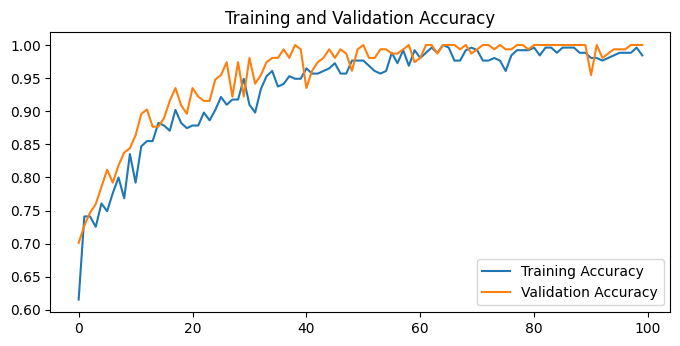

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

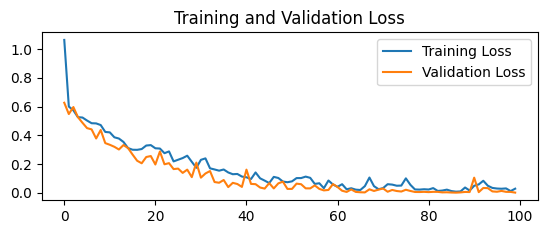

In [23]:
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

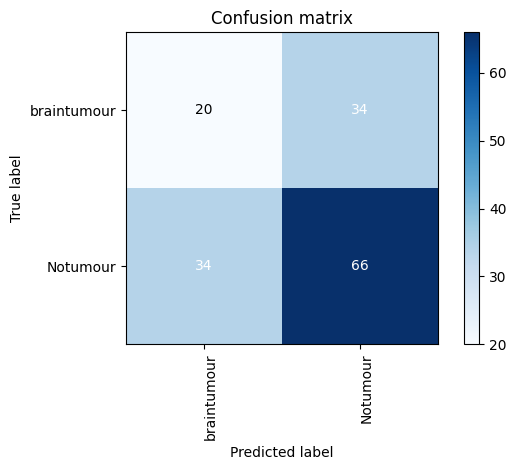

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Generate predictions and compute the confusion matrix
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)

# Define class labels
class_names = ['braintumour', 'Notumour']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Set the x-axis and y-axis labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label')
# Rotate the x-axis labels to vertical orientation
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
# Loop over the data and annotate each cell with its value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
# Add a title to the plot
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Generate predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Generate the classification report
report = classification_report(val_generator.classes, y_pred, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

    Notumour       0.31      0.31      0.31        54
 braintumour       0.63      0.63      0.63       100

    accuracy                           0.52       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.52      0.52      0.52       154



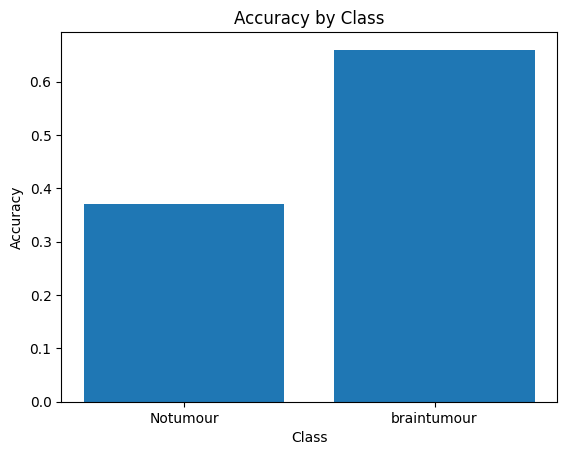

In [27]:
# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Get the class-wise accuracy values
class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)

# Create a bar chart
plt.bar(class_labels, class_wise_accuracy)
plt.title('Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()


In [28]:
# Evaluate the model on the validation data
_, accuracy = model.evaluate(val_generator)

# Print the validation accuracy
print('Validation Accuracy: %.2f' % (accuracy*100))


5/5 [==============================] - 1s 219ms/step - loss: 0.0013 - acc: 1.0000
Validation Accuracy: 100.00


In [ ]:
# Get the accuracy from the history object
accuracy = history.history['acc'][-1]

# Print the accuracy to the console
print("Accuracy: {:.2f}%".format(accuracy * 100))